In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier

### LOADING DATA

In [2]:
train_data = pd.read_csv('../data/all_points_s2.csv')

In [3]:
train_data._data

/var/folders/l8/mx9jxmfs26g9mp3g0c91v78w0000gn/T/ipykernel_88734/2324421042.py:1: DeprecationWarning: DataFrame._data is deprecated and will be removed in a future version. Use public APIs instead.
  train_data._data


BlockManager
Items: Index(['B1', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A',
       'B9', 'landcover', 'polygon_idx', 'month'],
      dtype='object')
Axis 1: RangeIndex(start=0, stop=363, step=1)
NumpyBlock: slice(0, 12, 1), 12 x 363, dtype: float64
NumpyBlock: slice(13, 14, 1), 1 x 363, dtype: int64
NumpyBlock: slice(12, 16, 2), 2 x 363, dtype: object

In [4]:
train_data.head()

,B1,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,B9,landcover,polygon_idx,month
0,0.404667,0.654667,0.532667,0.340667,0.446000,0.418667,0.639000,0.681000,0.596667,0.501333,0.634333,0.741333,urban,0,2024-01
1,0.348167,0.673500,0.598333,0.267667,0.340667,0.361500,0.547333,0.601500,0.644167,0.507167,0.607833,0.696833,urban,0,2024-02
2,0.388500,0.779000,0.668667,0.331000,0.396333,0.422333,0.661000,0.680500,0.736500,0.625500,0.725167,0.790333,urban,0,2024-03
3,0.433333,0.883667,0.783333,0.376667,0.488667,0.499000,0.704667,0.802000,0.829667,0.751333,0.898667,0.936333,urban,0,2024-04
4,0.425667,0.883000,0.724000,0.422667,0.465333,0.554333,0.788333,0.852667,0.797667,0.780333,0.930333,0.951667,urban,0,2024-05


### Processing

In [5]:
train_data= train_data.copy()
# find all unique values of training data names to use as classes
classes = sorted(train_data['landcover'].unique())
print(classes)

class_dict = dict(zip(classes, range(len(classes))))
train_data['class'] = train_data['landcover'].map(class_dict)

['bare', 'urban', 'vegetation', 'water']


In [97]:
train_data_feature= train_data.drop(columns=['month', 'landcover', 'polygon_idx']).copy()

In [6]:
X = train_data.drop(  columns=['class'])
y = train_data['class']

### Creating models 

In [7]:
# Split sample to train and test
seeds = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seeds)



In [9]:
from sklearn.preprocessing import LabelEncoder

cat_cols = X_train.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in cat_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [10]:
rf_model= RandomForestClassifier(n_estimators=100, random_state=seeds)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


[0 1 2 3]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         9

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



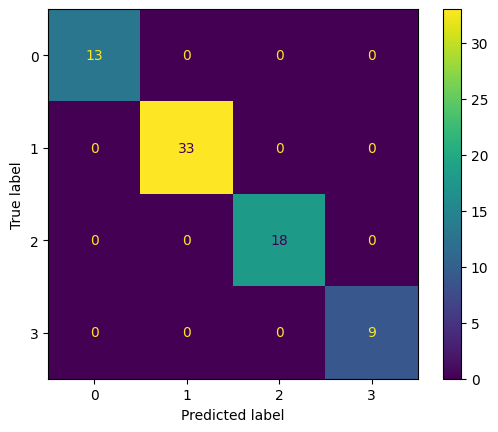

In [11]:
# Test model
y_pred = rf_model.predict(X_test)
print(np.unique(y_pred))

cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

# Report
report = classification_report(y_test, y_pred)
print(report)

In [12]:
import numpy as np 

In [13]:
arr = np.array([1, 3])

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'